In [31]:
import re
import pandas as pd
import numpy as np
import scipy
from numpy import mean, sqrt, std
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import string
from scipy.stats.stats import pearsonr
%matplotlib inline
%config InlineBackend.figure_format= "svg"
font = {'family' : 'times new roman',
        'weight' : 'light',
        'size'   : 11}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
IMG_ROOT = "./graphs/"

In [32]:
repo_db = pd.read_csv('repoDB.csv')
issue_db = pd.read_csv('issueDB.csv')

In [33]:
def cliffs_delta(x,y): # cohen_d
    number = abs(mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
    size = ""
    if number < 0.2:
        size =  'negligible'
    elif number < 0.5:
        size =  'small'
    elif number < 0.8:
        size =  'medium'
    elif number < 1.3:
        size =  'large'
    else:
        size =  'very large'
    return number,size

In [34]:
def p_value(x, y):
    result = scipy.stats.ranksums(x, y)
    delta = cliffs_delta(x, y)
    return result, delta

In [35]:
conference_count = {}
year_count = {}
for index, paper in repo_db.iterrows():
    conference = paper['Conference_Paper']
    year = paper['Year_Paper']
    if conference in conference_count:
        conference_count[conference] += 1
    else:
        conference_count[conference] = 1
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1

# change every key except 'neurips' to upper case
keys = list(conference_count.keys())
for key in keys:
    if key != 'neurips':
        conference_count[key.upper()] = conference_count.pop(key)
    else:
        conference_count['NeurIPS'] = conference_count.pop(key)

In [36]:
print("Statistics of the repoDB")
print(f"Number of repos: {len(repo_db)}")

Statistics of the repoDB
Number of repos: 576


Distribution of conference: 
{'CVPR': 140, 'ICLR': 118, 'ICML': 47, 'NeurIPS': 76, 'ECCV': 37, 'ICCV': 78, 'AAAI': 4, 'ACL': 75, 'AAMAS': 1}


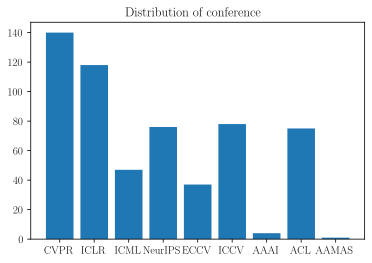

In [37]:
print(f"Distribution of conference: \n{conference_count}")
plt.bar(conference_count.keys(), conference_count.values())
plt.title("Distribution of conference")
plt.savefig(IMG_ROOT + "conference_distribution_bar.svg")
plt.show()

Distribution of publication year: 
{2013: 2, 2014: 9, 2015: 17, 2016: 28, 2017: 74, 2018: 120, 2019: 96, 2020: 89, 2021: 77, 2022: 64}


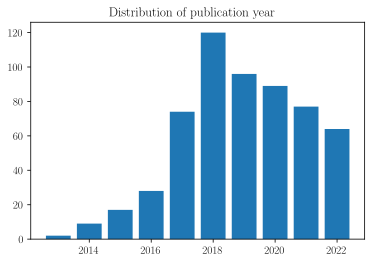

In [38]:
year_count = {k: v for k, v in sorted(year_count.items(), key=lambda item: item[0])}
print(f"Distribution of publication year: \n{year_count}")
plt.bar(year_count.keys(), year_count.values())
plt.title("Distribution of publication year")
plt.savefig(IMG_ROOT + "year_distribution_bar.svg")
plt.show()

Distribution of stars:
count      576.000000
mean       508.036458
std       2626.161951
min          0.000000
25%         17.000000
50%         52.500000
75%        208.000000
max      26315.000000
Name: Num_Star, dtype: float64


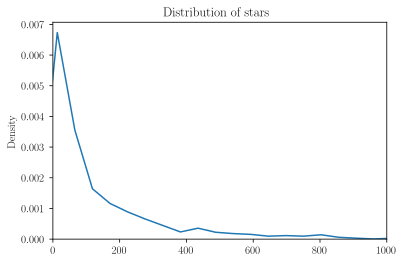

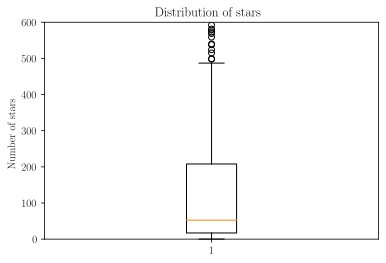

In [39]:
print(f"Distribution of stars:")
print(f"{repo_db['Num_Star'].describe()}")
graph = repo_db['Num_Star'].plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0.,right=1000)
plt.title("Distribution of stars")
plt.savefig(IMG_ROOT + "star_distribution_density.svg")
plt.show()
#Create box plot
fig, ax = plt.subplots()
ax.boxplot(repo_db['Num_Star'])
ax.set_ylabel('Number of stars')
ax.set_ylim([0, 600])
plt.title("Distribution of stars")
plt.savefig(IMG_ROOT + "star_distribution_box.svg")
plt.show()

Distribution of forks:
count      576.000000
mean       136.461806
std        807.077236
min          0.000000
25%          4.000000
50%         11.000000
75%         46.000000
max      11160.000000
Name: Num_Fork, dtype: float64


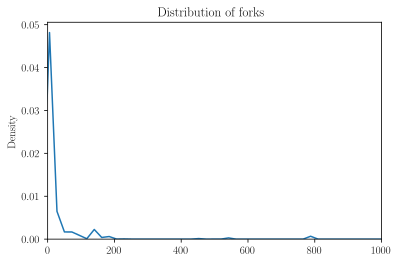

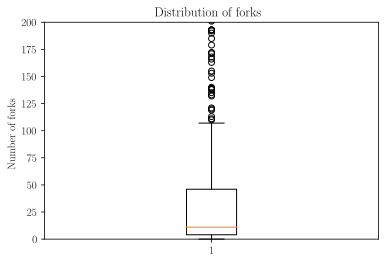

In [40]:
print(f"Distribution of forks:")
print(f"{repo_db['Num_Fork'].describe()}")
graph = repo_db['Num_Fork'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=1000)
plt.title("Distribution of forks")
plt.savefig(IMG_ROOT + "fork_distribution_density.svg")
plt.show()
#Create box plot
fig, ax = plt.subplots()
ax.boxplot(repo_db['Num_Fork'])
ax.set_ylabel('Number of forks')
ax.set_ylim([0, 200])
plt.title("Distribution of forks")
plt.savefig(IMG_ROOT + "fork_distribution_box.svg")
plt.show()

Distribution of watchers:
count    576.000000
mean      18.600694
std       69.187661
min        0.000000
25%        3.000000
50%        6.000000
75%       12.000000
max      711.000000
Name: Num_Watcher, dtype: float64


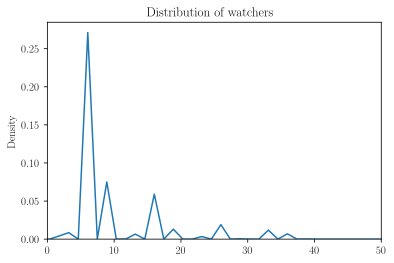

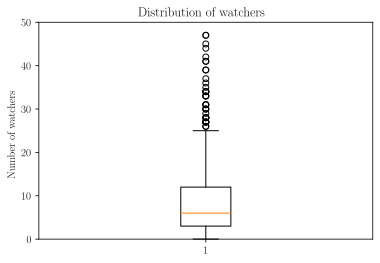

In [41]:
print(f"Distribution of watchers:")
print(f"{repo_db['Num_Watcher'].describe()}")
graph = repo_db['Num_Watcher'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=50)
plt.title("Distribution of watchers")
plt.savefig(IMG_ROOT + "watcher_distribution_density.svg")
plt.show()
#Create box plot
fig, ax = plt.subplots()
ax.boxplot(repo_db['Num_Watcher'])
ax.set_ylabel('Number of watchers')
ax.set_ylim([0, 50])
plt.title("Distribution of watchers")
plt.savefig(IMG_ROOT + "watcher_distribution_box.svg")
plt.show()

Distribution of contributors:
count    570.000000
mean       5.345614
std       28.191129
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      391.000000
dtype: float64


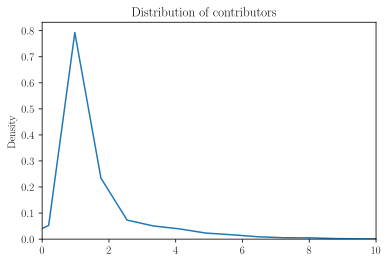

In [42]:
repo_contributor = {}
for repo, index in repo_db.iterrows():
    repo_name_path = repo_db.loc[repo, 'Name_Repo'].split("/")
    key = repo_name_path[0] + "/" + repo_name_path[1]
    value = len(repo_db.loc[repo, 'Contributors'].split("\n") if not pd.isna(repo_db.loc[repo, 'Contributors']) else [])
    repo_contributor[key] = value

print(f"Distribution of contributors:")
print(f"{pd.Series(repo_contributor).describe()}")
graph = pd.Series(repo_contributor).plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=10)
plt.title("Distribution of contributors")
plt.savefig(IMG_ROOT + "contributor_distribution_density.svg")
plt.show()

In [43]:
repo_with_no_issue = len(repo_db[repo_db.Num_Issue==0])
repo_with_no_open_issue = len(repo_db[repo_db.Num_Issue_Open==0])
repo_with_no_closed_issue = len(repo_db[repo_db.Num_Issue_Closed==0])
repo_number = len(repo_db)
print(f"Total number of repos: {repo_number}")
print(f"Number of repos with no issue: {repo_with_no_issue} ({repo_with_no_issue/repo_number*100:.2f}%)")
print(f"Number of repos with no open issue: {repo_with_no_open_issue} ({repo_with_no_open_issue/repo_number*100:.2f}%)")
print(f"Number of repos with no closed issue: {repo_with_no_closed_issue} ({repo_with_no_closed_issue/repo_number*100:.2f}%)")

Total number of repos: 576
Number of repos with no issue: 122 (21.18%)
Number of repos with no open issue: 206 (35.76%)
Number of repos with no closed issue: 183 (31.77%)


In [44]:
total_num_issue = issue_db.shape[0]
print(f"Total number of issues: {total_num_issue}")
total_num_open_issue = len(issue_db[issue_db.State=='open'])
print(f"Total number of open issues: {total_num_open_issue} ({total_num_open_issue/total_num_issue*100:.2f}%)")
total_num_closed_issue = len(issue_db[issue_db.State=='closed'])
print(f"Total number of closed issues: {total_num_closed_issue} ({total_num_closed_issue/total_num_issue*100:.2f}%)")

Total number of issues: 24953
Total number of open issues: 8102 (32.47%)
Total number of closed issues: 16851 (67.53%)


Distribution of issue ignore rate: (repos with no issue are excluded)


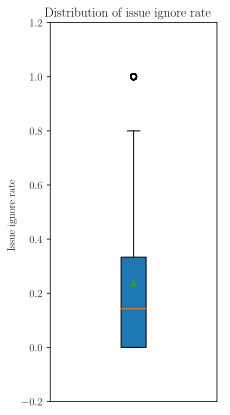

In [45]:
print(f"Distribution of issue ignore rate: (repos with no issue are excluded)")
ignore_rate_list = []
for index, repo in repo_db.iterrows():
    if repo['Num_Issue'] == 0:
        continue
    else:
        ignored_issue_num = 0
        for issue in issue_db[issue_db.Name_Repo==repo['Name_Repo']].iterrows():
            if issue[1]['State'] == 'open' and issue[1]['Num_Comment'] == 0:
                ignored_issue_num += 1

        ignore_rate = ignored_issue_num/repo['Num_Issue']
        ignore_rate_list.append(ignore_rate)

#Create box plot
fig = plt.figure(figsize=(3,7))
plt.boxplot(ignore_rate_list, vert=True, showfliers=True, showmeans=True, patch_artist = True, boxprops = {'facecolor':'#1e78b4'},)
plt.tick_params(bottom = False, labelbottom = False)
plt.ylabel('Issue ignore rate')
plt.ylim([-0.2, 1.2])
plt.title("Distribution of issue ignore rate")
plt.savefig(IMG_ROOT + "issue_ignore_rate_distribution_exclude_no_issue_repo_box.svg")
plt.show()

Distribution of issue close rate: (repos with no issue are excluded)
Number of repos with all closed issues: 81 (14.06%)
count    454.000000
mean       0.567251
std        0.336043
min        0.000000
25%        0.333333
50%        0.600000
75%        0.893056
max        1.000000
dtype: float64


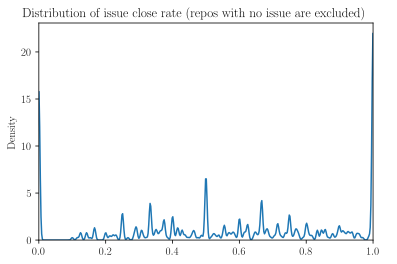

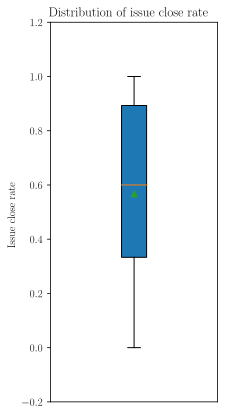

In [46]:
print(f"Distribution of issue close rate: (repos with no issue are excluded)")
closed_rate_list = []
all_closed_issue = 0
for index, repo in repo_db.iterrows():
    if repo['Num_Issue'] == 0:
        continue
    else:
        close_rate = repo['Num_Issue_Closed']/repo['Num_Issue']
        closed_rate_list.append(close_rate)
        if repo['Num_Issue_Open'] == 1:
            all_closed_issue += 1
print(f"Number of repos with all closed issues: {all_closed_issue} ({all_closed_issue/repo_number*100:.2f}%)")
graph = pd.Series(closed_rate_list).plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=1)
print(f"{pd.Series(closed_rate_list).describe()}")
plt.title("Distribution of issue close rate (repos with no issue are excluded)")
plt.savefig(IMG_ROOT + "issue_close_rate_distribution_density.svg")
plt.show()
#Create box plot
fig = plt.figure(figsize=(3,7))
plt.boxplot(closed_rate_list, vert=True, showfliers=True, showmeans=True, patch_artist = True, boxprops = {'facecolor':'#1e78b4'},)
plt.tick_params(bottom = False, labelbottom = False)
plt.ylabel('Issue close rate')
plt.ylim([-0.2, 1.2])
plt.title("Distribution of issue close rate")
plt.savefig(IMG_ROOT + "issue_close_rate_distribution_exclude_no_issue_repo_box.svg")
plt.show()

Distribution of issue close rate: (! repos with < 10 issue)
Number of repos with all closed issues: 15 (2.60%)
count    196.000000
mean       0.629030
std        0.238257
min        0.100000
25%        0.416159
50%        0.648529
75%        0.844643
max        1.000000
dtype: float64


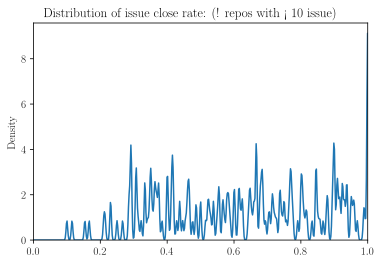

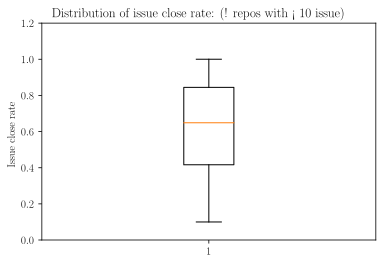

In [47]:
closed_rate_list = []
issue_threshold = 10
print(f"Distribution of issue close rate: (! repos with < {issue_threshold} issue)")
all_closed_issue = 0
for index, repo in repo_db.iterrows():
    if repo['Num_Issue'] < issue_threshold:
        continue
    else:
        close_rate = repo['Num_Issue_Closed']/repo['Num_Issue']
        closed_rate_list.append(close_rate)
        if repo['Num_Issue_Open'] == 1:
            all_closed_issue += 1
print(f"Number of repos with all closed issues: {all_closed_issue} ({all_closed_issue/repo_number*100:.2f}%)")
graph = pd.Series(closed_rate_list).plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=1)
closed_rate_list = pd.Series(closed_rate_list)
print(f"{closed_rate_list.describe()}")
plt.title(f"Distribution of issue close rate: (! repos with < {issue_threshold} issue)")
plt.savefig(IMG_ROOT + f"issue_close_rate_distribution_density.svg")
plt.show()
#Create box plot
fig, ax = plt.subplots()
ax.boxplot(closed_rate_list)
ax.set_ylabel('Issue close rate')
ax.set_ylim([0, 1.2])
plt.title(f"Distribution of issue close rate: (! repos with < {issue_threshold} issue)")
plt.savefig(IMG_ROOT + f"issue_close_rate_distribution_box.svg")
plt.show()

Distribution of issue resolved time (day):
4
count    16851.000000
mean        46.945107
std        135.344744
min          0.000000
25%          0.000000
50%          4.000000
75%         26.000000
max       2048.000000
dtype: float64


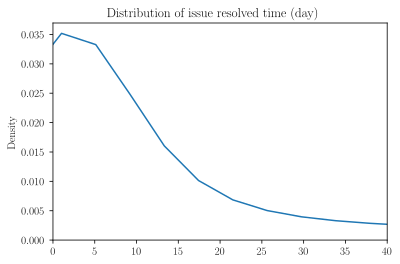

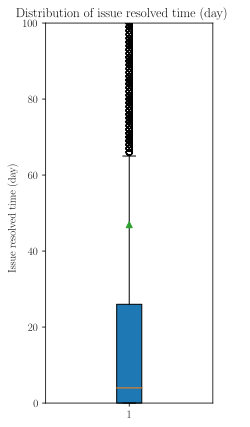

In [48]:
resolve_time_list = []
print(f"Distribution of issue resolved time (day):")

for index, issue in issue_db.iterrows():
    if issue['State'] == 'closed':
        open_date = datetime.strptime(issue['Date_Created'], "%Y-%m-%d %H:%M:%S")
        close_date = datetime.strptime(issue['Date_Closed'], "%Y-%m-%d %H:%M:%S")
        resolve_time = (close_date - open_date).days
        resolve_time_list.append(resolve_time)
print(resolve_time_list[0])
print(f"{pd.Series(resolve_time_list).describe()}")
graph = pd.Series(resolve_time_list).plot.kde(bw_method=0.05)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=40)
plt.title("Distribution of issue resolved time (day)")
plt.savefig(IMG_ROOT + "issue_resolve_time_distribution_density.svg")
plt.show()

#Create box plot
fig = plt.figure(figsize=(3,7))
plt.boxplot(resolve_time_list, vert=True, showfliers=True, showmeans=True, patch_artist = True, boxprops = {'facecolor':'#1e78b4'},)
plt.ylabel('Issue resolved time (day)')
plt.ylim([0, 100])
plt.title("Distribution of issue resolved time (day)")
plt.savefig(IMG_ROOT + "issue_resolve_time_distribution_box.svg")
plt.show()

In [49]:
repo_with_label_utilized = 0
repo_with_assignee_utilized = 0
for index, repo in repo_db.iterrows():
    if repo['Num_Issue_Open_No_Label'] + repo['Num_Issue_Closed_No_Label'] < repo['Num_Issue']:
        repo_with_label_utilized += 1
    if repo['Num_Issue_Open_No_Label'] + repo['Num_Issue_Closed_No_Label'] > repo['Num_Issue']:
        print("NANI?")
    if repo['Num_Issue_Open_No_Assignee'] + repo['Num_Issue_Closed_No_Assignee'] < repo['Num_Issue']:
        repo_with_assignee_utilized += 1
    if repo['Num_Issue_Open_No_Assignee'] + repo['Num_Issue_Closed_No_Assignee'] > repo['Num_Issue']:
        print("NANI?")
print(f"Number of repos with label utilized: {repo_with_label_utilized} ({repo_with_label_utilized/len(repo_db)*100:.2f}%)")
print(f"Number of repos with assignee utilized: {repo_with_assignee_utilized} ({repo_with_assignee_utilized/len(repo_db)*100:.2f}%)")
print("PS: repo with no issue is not counted in the above number")

Number of repos with label utilized: 45 (7.81%)
Number of repos with assignee utilized: 34 (5.90%)
PS: repo with no issue is not counted in the above number


In [50]:
issue_with_label = 0
issue_with_assignee = 0
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        issue_with_label += 1
    if not pd.isna(issue['Assignees']):
        issue_with_assignee += 1
print(f"Number of issues with label utilized: {issue_with_label} ({issue_with_label/len(issue_db)*100:.2f}%)")
print(f"Number of issues with assignee utilized: {issue_with_assignee} ({issue_with_assignee/len(issue_db)*100:.2f}%)")

Number of issues with label utilized: 2849 (11.42%)
Number of issues with assignee utilized: 4104 (16.45%)


In [51]:
default_issue_labels = ['bug', 'documentation', 'duplicate', 'enhancement',
                        'good first issue', 'help wanted', 'invalid', 'question', 'wontfix']
repo_with_new_label = 0
for index, repo in repo_db.iterrows():
    for issue_type in repo["Issue_Types"].split("#"):
        if issue_type not in default_issue_labels:
            #print(issue_type)
            repo_with_new_label += 1
            break
print(f"Number of repos with new label: {repo_with_new_label} ({repo_with_new_label/len(repo_db)*100:.2f}%)")

Number of repos with new label: 83 (14.41%)


Number of unique labels: 109
[('bug', 408), ('enhancement', 305), ('awaiting response', 220), ('community help wanted', 213), ('help wanted', 210), ('good first issue', 169), ('community discussion', 163), ('reimplementation', 154), ('question', 151), ('Feature Request', 104), ('invalid', 83), ('optimizers', 82), ('build', 80), ('seq2seq', 75), ('duplicate', 72), ('documentation', 72), ('contribution welcome', 68), ('feature request', 67), ('Doc', 62), ('layers', 60), ('installation/env', 59), ('xgraph', 58), ('image', 57), ('usage', 56), ('deployment', 49), ('ONNX', 42), ('discussion needed', 41), ('metrics', 39), ('test-cases', 38), ('v-3.x', 36), ('losses', 35), ('planned feature', 29), ('How-to', 29), ('windows', 28), ('tutorials', 26), ('crf', 25), ('triaged', 24), ('Stale', 22), ('activations', 19), ('3dgraph', 19), ('callbacks', 18), ('fixed', 18), ('custom-ops', 16), ('text', 15), ('style', 13), ('needs more info', 12), ('bootcamp', 11), ('wontfix', 10), ('in progress', 10), ('

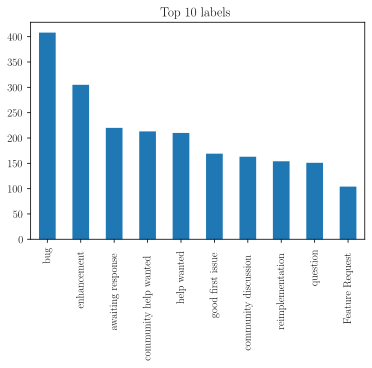

In [52]:
# Count the occurrence of each label
label_count = {}
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        for label in issue['Label_Issue'].split("#"):
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
print(f"Number of unique labels: {len(label_count)}")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels:")
top_10_labels = pd.Series(label_count).sort_values(ascending=False).head(10)
print(top_10_labels)
graph = top_10_labels.plot.bar()
plt.title("Top 10 labels")
plt.savefig(IMG_ROOT + "top_10_labels_box.svg")
plt.show()

In [53]:
from numpy import transpose
from scipy import stats

# Get the label names of the top 10 labels
top_7_label_names = [i for i,l in top_10_labels.iteritems()][0:7]
open_issue_stat = {}
closed_issue_stat = {}
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        for label in issue['Label_Issue'].split("#"):
            if issue['State'] == 'open':
                if label in top_7_label_names:
                    if label in open_issue_stat:
                        open_issue_stat[label] += 1
                    else:
                        open_issue_stat[label] = 1
                else:
                    if 'other' in open_issue_stat:
                        open_issue_stat['other'] += 1
                    else:
                        open_issue_stat['other'] = 1
            elif issue['State'] == 'closed':
                if label in top_7_label_names:
                    if label in closed_issue_stat:
                        closed_issue_stat[label] += 1
                    else:
                        closed_issue_stat[label] = 1
                else:
                    if 'other' in closed_issue_stat:
                        closed_issue_stat['other'] += 1
                    else:
                        closed_issue_stat['other'] = 1
            else:
                print("NANI?")
print(open_issue_stat)
print(closed_issue_stat)
#get p-value
for label in top_7_label_names + ['other']:
    #distribution_open = ["1"]*open_issue_stat[label] + ["0"]*(len(issue_db[issue_db['State'] == 'open'])-open_issue_stat[label])
    #distribution_closed = ["1"]*closed_issue_stat[label] + ["0"]*(len(issue_db[issue_db['State'] == 'closed'])-closed_issue_stat[label])
    #p = scipy.stats.ranksums(distribution_open, distribution_closed)[1]
    #print(f"p-value of {label}: {p} [{'significant' if p < 0.05 else 'not significant'}]")

    table  = [[open_issue_stat[label], len(issue_db[issue_db['State'] == 'open'])-open_issue_stat[label]],
              [closed_issue_stat[label], len(issue_db[issue_db['State'] == 'closed'])-closed_issue_stat[label]]]
    assert table[0][0] + table[0][1] == len(issue_db[issue_db['State'] == 'open'])
    assert table[1][0] + table[1][1] == len(issue_db[issue_db['State'] == 'closed'])
    print(f"Fisher exact test of {label}: {scipy.stats.fisher_exact(table)[1]} [{'significant' if scipy.stats.fisher_exact(table)[1] < 0.05 else 'not significant'}]")


{'bug': 53, 'help wanted': 51, 'other': 459, 'enhancement': 74, 'community help wanted': 43, 'awaiting response': 1, 'community discussion': 28, 'good first issue': 44}
{'help wanted': 159, 'good first issue': 125, 'other': 1749, 'enhancement': 231, 'bug': 355, 'awaiting response': 219, 'community discussion': 135, 'community help wanted': 170}
Fisher exact test of bug: 7.722135778732521e-20 [significant]
Fisher exact test of enhancement: 0.0020426049919991503 [significant]
Fisher exact test of awaiting response: 2.7964366727979412e-36 [significant]
Fisher exact test of community help wanted: 8.90289657613411e-05 [significant]
Fisher exact test of help wanted: 0.011671494232961651 [significant]
Fisher exact test of good first issue: 0.08313594768816127 [not significant]
Fisher exact test of community discussion: 1.5428993326643103e-05 [significant]
Fisher exact test of other: 5.141093070254198e-37 [significant]


Number of unique labels (academia): 27
[('enhancement', 100), ('xgraph', 58), ('question', 51), ('good first issue', 48), ('bug', 31), ('3dgraph', 19), ('documentation', 17), ('help wanted', 15), ('Resolved', 10), ('ggraph', 6), ('wontfix', 5), ('sslgraph', 3), ('duplicate', 3), ('todo', 2), ('fixed', 2), ('InProgress', 2), ('Literatures', 2), ('result reproduced', 2), ('Old GLUE', 2), ('benchmark', 1), ('ggraph3D', 1), ('Wait a moment', 1), ('invalid', 1), ('contributions welcome', 1), ('MTL Alg', 1), ('solved', 1), ('Future implement list', 1)]
Number of unique labels (industry): 92
[('bug', 377), ('awaiting response', 220), ('community help wanted', 213), ('enhancement', 205), ('help wanted', 195), ('community discussion', 163), ('reimplementation', 154), ('good first issue', 121), ('Feature Request', 104), ('question', 100), ('invalid', 82), ('optimizers', 82), ('build', 80), ('seq2seq', 75), ('duplicate', 69), ('contribution welcome', 68), ('feature request', 67), ('Doc', 62), ('l

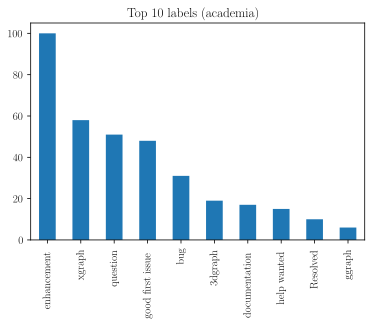

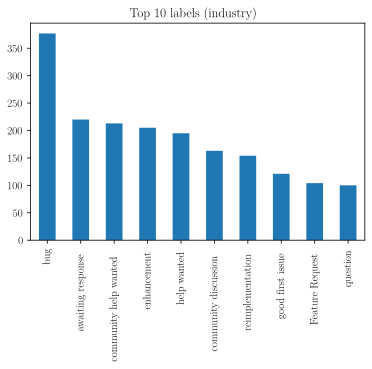

In [54]:
# Count the occurrence of each label （Comparing academia and industry)
label_count_academia = {}
label_count_industry = {}
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        type = "" # academia or industry
        for index, repo in repo_db.iterrows():
            repo_name_iter = repo['Name_Repo'].split("/")
            repo_name = repo_name_iter[0] + "/" + repo_name_iter[1]
            if repo_name == issue['Name_Repo']:
                type = repo['Owners']
                break
        if type == "academia":
            for label in issue['Label_Issue'].split("#"):
                if label in label_count_academia:
                    label_count_academia[label] += 1
                else:
                    label_count_academia[label] = 1
        elif type == "industry":
            for label in issue['Label_Issue'].split("#"):
                if label in label_count_industry:
                    label_count_industry[label] += 1
                else:
                    label_count_industry[label] = 1
        else:
            print("NANI?")
print(f"Number of unique labels (academia): {len(label_count_academia)}")
print(sorted(label_count_academia.items(), key=lambda x: x[1], reverse=True))
print(f"Number of unique labels (industry): {len(label_count_industry)}")
print(sorted(label_count_industry.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels (academia):")
print(sorted(label_count_academia.items(), key=lambda x: x[1], reverse=True)[:10])
print(f"Top 10 labels (industry):")
print(sorted(label_count_industry.items(), key=lambda x: x[1], reverse=True)[:10])
graph = pd.Series(label_count_academia).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (academia)")
plt.savefig(IMG_ROOT + "top_10_labels_academia_box.svg")
plt.show()
graph = pd.Series(label_count_industry).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (industry)")
plt.savefig(IMG_ROOT + "top_10_labels_industry_box.svg")
plt.show()

Number of unique labels (with mono repo dropped): 55
[('enhancement', 270), ('bug', 229), ('awaiting response', 220), ('community help wanted', 213), ('community discussion', 163), ('reimplementation', 154), ('question', 98), ('invalid', 80), ('duplicate', 69), ('feature request', 67), ('Doc', 62), ('installation/env', 59), ('xgraph', 58), ('usage', 56), ('good first issue', 51), ('deployment', 49), ('ONNX', 42), ('v-3.x', 36), ('planned feature', 29), ('How-to', 29), ('help wanted', 25), ('windows', 22), ('Stale', 22), ('3dgraph', 19), ('documentation', 17), ('Resolved', 10), ('Dev-RD', 9), ('wontfix', 7), ('upstream', 6), ('WIP', 6), ('ggraph', 6), ('v-2.x', 5), ('P0', 4), ('upcoming', 4), ('major-new-functionality', 4), ('P1', 3), ('sslgraph', 3), ('dependencies', 3), ('low-priority', 3), ('todo', 2), ('fixed', 2), ('InProgress', 2), ('Literatures', 2), ('result reproduced', 2), ('Old GLUE', 2), ('typo', 1), ('fp16', 1), ('need-more-info', 1), ('benchmark', 1), ('ggraph3D', 1), ('Wa

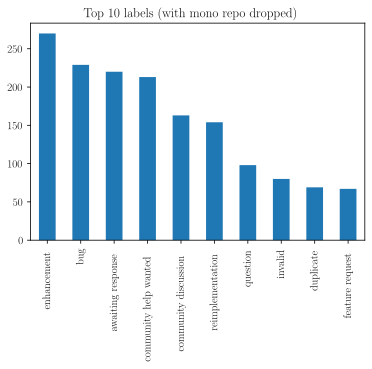

In [55]:
#Count the occurrence of each label with mono repo removed
label_count = {}
for index, issue in issue_db.iterrows():
    repo = repo_db[repo_db['Name_Repo']==issue['Name_Repo']]
    if repo.empty: # In this case, the repo is a nested repo URL (e.g. google-research/federated/blob/master/README.md)
        continue
    if repo['Mono_Repo'].iloc[0] == 1: # In this case, the repo is marked as a mono repo
        #print(issue['Name_Repo'])
        continue
    if not pd.isna(issue['Label_Issue']):
        for label in issue['Label_Issue'].split("#"):
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
print(f"Number of unique labels (with mono repo dropped): {len(label_count)}")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels (with mono repo dropped):")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True)[:10])
graph = pd.Series(label_count).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (with mono repo dropped)")
plt.savefig(IMG_ROOT + "top_10_labels_mono_repo_dropped_box.svg")
plt.show()

Distribution of number of comments per issue:
count    24953.000000
mean         2.977999
std          5.094887
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        193.000000
Name: Num_Comment, dtype: float64


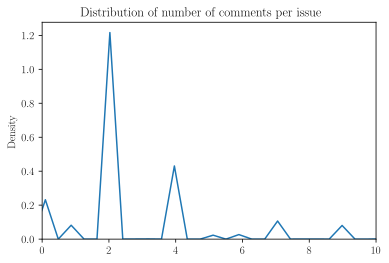

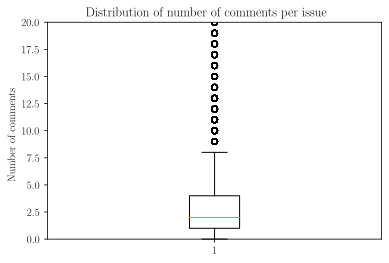

In [56]:
print('Distribution of number of comments per issue:')
comment_count_list = []
for index, issue in issue_db.iterrows():
    comment_count_list.append(issue['Num_Comment'])
print(f"{issue_db['Num_Comment'].describe()}")
graph = issue_db['Num_Comment'].plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=10)
plt.title("Distribution of number of comments per issue")
plt.savefig(IMG_ROOT + "num_comment_distribution_density.svg")
plt.show()
#Create box plot
fig, ax = plt.subplots()
ax.boxplot(comment_count_list)
ax.set_ylabel('Number of comments')
ax.set_ylim([0, 20])
plt.title("Distribution of number of comments per issue")
plt.savefig(IMG_ROOT + "num_comment_distribution_box.svg")
plt.show()

In [57]:
self_closed_issue = 0
total_num_closed_issue = issue_db[issue_db['State'] == 'closed'].shape[0]
for index, issue in issue_db.iterrows():
    if issue['State'] == 'closed' and pd.isna(issue['Proposed_By']):
        print("NANI?")
    if issue['State'] == 'closed' and issue['Proposed_By'] == issue['Closed_By']:
        self_closed_issue += 1
print(f"Number of self closed issue: {self_closed_issue} ({self_closed_issue/total_num_closed_issue*100:.2f}%)")

Number of self closed issue: 6740 (40.00%)


In [58]:
# Apply filters here
star_threshold = 0
closed_issue_threshold = 0
total_issue_num_threshold = 0
outlier_repos = repo_db.query(f'(Num_Star < {star_threshold}) | '
                              f'(Num_Issue_Closed < {closed_issue_threshold}) |'
                              f'(Num_Issue < {total_issue_num_threshold})')['Name_Repo'].tolist()
print(f"Number of outlier repos: {len(outlier_repos)}")

open_issue_db = issue_db[issue_db['State'] == 'open']
open_issue_db = open_issue_db[~open_issue_db['Name_Repo'].isin(outlier_repos)]
closed_issue_db = issue_db[issue_db['State'] == 'closed']
closed_issue_db = closed_issue_db[~closed_issue_db['Name_Repo'].isin(outlier_repos)]

Number of outlier repos: 0


In [59]:
# Check the distribution difference of having labels between open and closed issues
open_issue_num = open_issue_db.shape[0]
print(f"Number of open issues: {open_issue_num}")
closed_issue_num = closed_issue_db.shape[0]
print(f"Number of closed issues: {closed_issue_num}")
open_issue_with_label_num = open_issue_db[~open_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of open issues with labels: {open_issue_with_label_num} ({open_issue_with_label_num/open_issue_num*100:.2f}%)")
open_issue_without_label_num = open_issue_db[open_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of open issues without labels: {open_issue_without_label_num} ({open_issue_without_label_num/open_issue_num*100:.2f}%)")
closed_issue_with_label_num = closed_issue_db[~closed_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of closed issues with labels: {closed_issue_with_label_num} ({closed_issue_with_label_num/closed_issue_num*100:.2f}%)")
closed_issue_without_label_num = closed_issue_db[closed_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of closed issues without labels: {closed_issue_without_label_num} ({closed_issue_without_label_num/closed_issue_num*100:.2f}%)")

open_issue_list = [0 if pd.isna(x) else 1 for x in open_issue_db['Label_Issue']]
closed_issue_list = [0 if pd.isna(x) else 1 for x in closed_issue_db['Label_Issue']]
result, delta = p_value(open_issue_list, closed_issue_list)
print(f"Have label VS don't have label: {result} (delta={delta})")
open_issue_list_2 = [0 if pd.isna(x) else len(x.split("#")) for x in open_issue_db['Label_Issue']]
closed_issue_list_2 = [0 if pd.isna(x) else len(x.split("#")) for x in closed_issue_db['Label_Issue']]
result_2, delta_2 = p_value(open_issue_list_2, closed_issue_list_2)
print(f"Number of labels: {result_2} (delta={delta_2})")

Number of open issues: 8102
Number of closed issues: 16851
Number of open issues with labels: 504 (6.22%)
Number of open issues without labels: 7598 (93.78%)
Number of closed issues with labels: 2345 (13.92%)
Number of closed issues without labels: 14506 (86.08%)
Have label VS don't have label: RanksumsResult(statistic=-9.858953134754442, pvalue=6.26996801505517e-23) (delta=(0.25784429023932565, 'small'))
Number of labels: RanksumsResult(statistic=-9.735492485855273, pvalue=2.127844584045161e-22) (delta=(0.19964286146212892, 'negligible'))


In [60]:
# Check the distribution difference of having assignees between open and closed issues
open_issue_with_assignee_num = open_issue_db[~open_issue_db['Assignees'].isna()].shape[0]
print(f"Number of open issues with assignees: {open_issue_with_assignee_num} ({open_issue_with_assignee_num/open_issue_num*100:.2f}%)")
open_issue_without_assignee_num = open_issue_db[open_issue_db['Assignees'].isna()].shape[0]
print(f"Number of open issues without assignees: {open_issue_without_assignee_num} ({open_issue_without_assignee_num/open_issue_num*100:.2f}%)")
closed_issue_with_assignee_num = closed_issue_db[~closed_issue_db['Assignees'].isna()].shape[0]
print(f"Number of closed issues with assignees: {closed_issue_with_assignee_num} ({closed_issue_with_assignee_num/closed_issue_num*100:.2f}%)")
closed_issue_without_assignee_num = closed_issue_db[closed_issue_db['Assignees'].isna()].shape[0]
print(f"Number of closed issues without assignees: {closed_issue_without_assignee_num} ({closed_issue_without_assignee_num/closed_issue_num*100:.2f}%)")
open_issue_list = [0 if pd.isna(x) else 1 for x in open_issue_db['Assignees']]
closed_issue_list = [0 if pd.isna(x) else 1 for x in closed_issue_db['Assignees']]
result,delta = p_value(open_issue_list, closed_issue_list)
print(f"Have assignee VS don't have assignee: {result} (delta={delta})")
open_issue_num_assignee = [0 if pd.isna(x) else len(x.split("\n")) for x in open_issue_db['Assignees']]
closed_issue_num_assignee = [0 if pd.isna(x) else len(x.split("\n")) for x in closed_issue_db['Assignees']]
result_2,delta_2 = p_value(open_issue_num_assignee, closed_issue_num_assignee)
print(f"Number of assignees: {result_2} (delta={delta_2})")

Number of open issues with assignees: 425 (5.25%)
Number of open issues without assignees: 7677 (94.75%)
Number of closed issues with assignees: 3679 (21.83%)
Number of closed issues without assignees: 13172 (78.17%)
Have assignee VS don't have assignee: RanksumsResult(statistic=-21.250301153632396, pvalue=3.2755800806160853e-100) (delta=(0.49968271598799313, 'small'))
Number of assignees: RanksumsResult(statistic=-21.264532717787578, pvalue=2.4188739651275604e-100) (delta=(0.4770859392117406, 'small'))


In [61]:
# Check the distribution difference of the length of issues title
def string_length(string):
    if pd.isna(string):
        return 0
    else:
        return len(string)
open_issue_title_length_list = [string_length(x) for x in open_issue_db['Title']]
closed_issue_title_length_list = [string_length(x) for x in closed_issue_db['Title']]
result,delta = p_value(open_issue_title_length_list, closed_issue_title_length_list)
print(f"Title length: {result} (delta={delta})")

Title length: RanksumsResult(statistic=0.23716677390323304, pvalue=0.8125274116042123) (delta=(0.014465572535765026, 'negligible'))


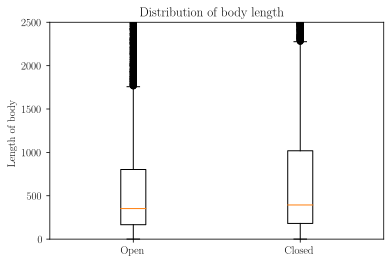

Body length: RanksumsResult(statistic=-7.513416634481793, pvalue=5.760383038612948e-14) (delta=(0.0750349931595096, 'negligible'))


In [62]:
# Check the distribution difference of the length of issues body
open_issue_body_length_list = [string_length(x) for x in open_issue_db['Body']]
closed_issue_body_length_list = [string_length(x) for x in closed_issue_db['Body']]
# Create box plot
fig, ax = plt.subplots()
ax.boxplot([open_issue_body_length_list, closed_issue_body_length_list])
ax.set_xticklabels(['Open', 'Closed'])
ax.set_ylabel('Length of body')
ax.set_ylim([0, 2500])
plt.title('Distribution of body length')
plt.savefig(IMG_ROOT + "issue_body_length_distribution_open&close_box.svg")
plt.show()

result,delta = p_value(open_issue_body_length_list, closed_issue_body_length_list)
print(f"Body length: {result} (delta={delta})")

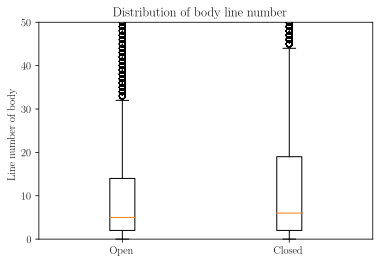

Body line number: RanksumsResult(statistic=-7.689220462108115, pvalue=1.4803419043804695e-14) (delta=(0.0945333902610593, 'negligible'))


In [63]:
def string_line_num(string):
    if pd.isna(string):
        return 0
    else:
        return len(string.split("\n"))
# Check the distribution difference of the length of issues body
open_issue_body_length_list = [string_line_num(x) for x in open_issue_db['Body']]
closed_issue_body_length_list = [string_line_num(x) for x in closed_issue_db['Body']]
# Create box plot
fig, ax = plt.subplots()
ax.boxplot([open_issue_body_length_list, closed_issue_body_length_list])
ax.set_xticklabels(['Open', 'Closed'])
ax.set_ylabel('Line number of body')
ax.set_ylim([0, 50])
plt.title('Distribution of body line number')
plt.savefig(IMG_ROOT + "issue_body_lineno_distribution_open&close_box.svg")
plt.show()

result,delta = p_value(open_issue_body_length_list, closed_issue_body_length_list)
print(f"Body line number: {result} (delta={delta})")

In [64]:
# Check the distribution difference of "is-english" between open and closed issues
def is_english(text):
    if pd.isna(text): return 0
    for char in text:
        if char not in string.printable: return 0
    return 1
open_issue_is_english_list = [is_english(x) for x in open_issue_db['Title']]
closed_issue_is_english_list = [is_english(x) for x in closed_issue_db['Title']]
result,delta = p_value(open_issue_is_english_list, closed_issue_is_english_list)
print(f"Number of open issues with English title: {sum(open_issue_is_english_list)} ({sum(open_issue_is_english_list)/open_issue_num*100:.2f}%)")
print(f"Number of closed issues with English title: {sum(closed_issue_is_english_list)} ({sum(closed_issue_is_english_list)/closed_issue_num*100:.2f}%)")
print(f"Is English: {result} (delta={delta})")

Number of open issues with English title: 7650 (94.42%)
Number of closed issues with English title: 15820 (93.88%)
Is English: RanksumsResult(statistic=0.6911307738317797, pvalue=0.48948336266166603) (delta=(0.02298955240661873, 'negligible'))


In [65]:
# Check the distribution difference of "Have code block" between open and closed issues
def have_code_block(text):
    if pd.isna(text): return 0
    if "```" in text: return 1
    return 0
open_issue_have_code_block_list = [have_code_block(x) for x in open_issue_db['Body']]
closed_issue_have_code_block_list = [have_code_block(x) for x in closed_issue_db['Body']]
print(f"Number of open issues with code block: {sum(open_issue_have_code_block_list)} ({sum(open_issue_have_code_block_list)/open_issue_num*100:.2f}%)")
print(f"Number of closed issues with code block: {sum(closed_issue_have_code_block_list)} ({sum(closed_issue_have_code_block_list)/closed_issue_num*100:.2f}%)")
result,delta = p_value(open_issue_have_code_block_list, closed_issue_have_code_block_list)
print(f"Have code block: {result} (delta={delta})")

Number of open issues with code block: 1004 (12.39%)
Number of closed issues with code block: 2939 (17.44%)
Have code block: RanksumsResult(statistic=-6.468646599410559, pvalue=9.888455514680456e-11) (delta=(0.14207952599205725, 'negligible'))


In [66]:
# Check the distribution difference of "Num of repo contributors" between open and closed issues
open_issue_num_repo_contributor_list = [repo_contributor[x] for x in open_issue_db['Name_Repo']]
closed_issue_num_repo_contributor_list = [repo_contributor[x] for x in closed_issue_db['Name_Repo']]
result,delta = p_value(open_issue_num_repo_contributor_list, closed_issue_num_repo_contributor_list)
print(f"Num of repo contributors: {result} (delta={delta})")

Num of repo contributors: RanksumsResult(statistic=-21.510525013310186, pvalue=1.2409198849086583e-102) (delta=(0.5370328143600513, 'medium'))


In [67]:
list_1A = open_issue_num_repo_contributor_list
list_2A = closed_issue_num_repo_contributor_list
list_1B = open_issue_num_assignee
list_2B = closed_issue_num_assignee

combined_distribution_1 = []
combined_distribution_2 = []
assert len(list_1A) == len(list_1B)
assert len(list_2A) == len(list_2B)
for i in range(len(list_1A)):
    combined_distribution_1.append((list_1A[i],list_1B[i]))
for i in range(len(list_2A)):
    combined_distribution_2.append((list_2A[i],list_2B[i]))
result,delta = p_value(combined_distribution_1, combined_distribution_2)
print(f"Num of repo contributors and assignees: {result} (delta={delta})")

Num of repo contributors and assignees: RanksumsResult(statistic=191.70367811568437, pvalue=0.0) (delta=(0.32737829620527864, 'small'))


In [68]:
# Check the distribution difference of Sentiment between open and closed issues title
def sentiment_convert(sentiment):
    if sentiment == "positive": return 1
    elif sentiment == "negative": return -1
    elif sentiment == "neutral": return 0
    else: print("Error")
open_issue_title_sentiment_list = [sentiment_convert(x) for x in open_issue_db['Sentiment_Title']]
closed_issue_title_sentiment_list = [sentiment_convert(x) for x in closed_issue_db['Sentiment_Title']]
result,delta = p_value(open_issue_title_sentiment_list, closed_issue_title_sentiment_list)
print(f"Sentiment (issue title): {result} (delta={delta})")
open_issue_body_sentiment_list = [sentiment_convert(x) for x in open_issue_db['Sentiment_Body']]
closed_issue_body_sentiment_list = [sentiment_convert(x) for x in closed_issue_db['Sentiment_Body']]
result,delta = p_value(open_issue_body_sentiment_list, closed_issue_body_sentiment_list)
print(f"Sentiment (issue body): {result} (delta={delta})")

Sentiment (issue title): RanksumsResult(statistic=0.2683108714072764, pvalue=0.7884600387559624) (delta=(0.007562692788316206, 'negligible'))
Sentiment (issue body): RanksumsResult(statistic=1.4737419970105319, pvalue=0.1405510706813946) (delta=(0.023514066397579175, 'negligible'))


In [69]:
# correlation analysis
repo_name_list = []
# x:
no_contributor_list = []
no_star_list = []
no_issue_list = []
assignee_utilize_rate_list = []

# y:
avg_issue_addressing_time_list = []
address_rate_list = []

for index, repo in repo_db.iterrows():
    repo_name = repo['Name_Repo'].split('/')[0] + '/' + repo['Name_Repo'].split('/')[1]
    if repo_name in repo_name_list: continue
    repo_name_list.append(repo_name)
    all_closed_issues = closed_issue_db[closed_issue_db['Name_Repo'] == repo_name]
    if len(all_closed_issues) == 0: continue
    issue_addressing_time = []
    for index, issue in all_closed_issues.iterrows():
        open_date = datetime.strptime(issue['Date_Created'], "%Y-%m-%d %H:%M:%S")
        close_date = datetime.strptime(issue['Date_Closed'], "%Y-%m-%d %H:%M:%S")
        resolve_time = (close_date - open_date).days
        issue_addressing_time.append(resolve_time)

    # Fill up Y
    avg_issue_addressing_time_list.append(np.mean(issue_addressing_time))
    address_rate_list.append(repo['Num_Issue_Closed']/repo['Num_Issue'])

    # Fill up X
    assignee_utilize_rate_list.append(float(len(issue_db[
                                              (issue_db['Name_Repo'] == repo_name) &
                                              (pd.notna(issue_db['Assignees']))
                                          ]))/repo['Num_Issue'])
    no_contributor_list.append(1 if pd.isna(repo["Contributors"]) else len(repo["Contributors"].split('\n')))
    no_star_list.append(repo["Num_Star"])
    no_issue_list.append(repo["Num_Issue"])
assert len(avg_issue_addressing_time_list) == len(no_contributor_list)
assert len(avg_issue_addressing_time_list) == len(no_star_list)
assert len(avg_issue_addressing_time_list) == len(no_issue_list)
assert len(avg_issue_addressing_time_list) == len(address_rate_list)
correlation_no_contributor_avg_addressing_time = scipy.stats.spearmanr(no_contributor_list, avg_issue_addressing_time_list)
correlation_no_star_avg_addressing_time = scipy.stats.spearmanr(no_star_list, avg_issue_addressing_time_list)
correlation_no_issue_avg_addressing_time = scipy.stats.spearmanr(no_issue_list, avg_issue_addressing_time_list)
correlation_no_contributor_address_rate = scipy.stats.spearmanr(no_contributor_list, address_rate_list)
correlation_no_star_address_rate = scipy.stats.spearmanr(no_star_list, address_rate_list)
correlation_no_issue_address_rate = scipy.stats.spearmanr(no_issue_list, address_rate_list)
print(f"Number of repositories: {len(no_star_list)}")
print(f"Correlation between no. contributors and avg. issue addressing time: {correlation_no_contributor_avg_addressing_time[0]} with two-tailed p-value: {correlation_no_contributor_avg_addressing_time[1]}")
print(f"Correlation between no. stars and avg. issue addressing time: {correlation_no_star_avg_addressing_time[0]} with two-tailed p-value: {correlation_no_star_avg_addressing_time[1]}")
print(f"Correlation between no. issues and avg. issue addressing time: {correlation_no_issue_avg_addressing_time[0]} with two-tailed p-value: {correlation_no_issue_avg_addressing_time[1]}")
print(f"Correlation between no. contributors and address rate: {correlation_no_contributor_address_rate[0]} with two-tailed p-value: {correlation_no_contributor_address_rate[1]}")
print(f"Correlation between no. stars and address rate: {correlation_no_star_address_rate[0]} with two-tailed p-value: {correlation_no_star_address_rate[1]}")
print(f"Correlation between no. issues and address rate: {correlation_no_issue_address_rate[0]} with two-tailed p-value: {correlation_no_issue_address_rate[1]}")


#print(scipy.stats.spearmanr(no_contributor_list, no_star_list))
#print(scipy.stats.spearmanr(no_contributor_list, no_issue_list))
#print(scipy.stats.spearmanr(no_star_list, no_issue_list))

Number of repositories: 387
Correlation between no. contributors and avg. issue addressing time: 0.09591365822188844 with two-tailed p-value: 0.05941791969831994
Correlation between no. stars and avg. issue addressing time: 0.21682317281983532 with two-tailed p-value: 1.6856845283538456e-05
Correlation between no. issues and avg. issue addressing time: 0.24116641788235613 with two-tailed p-value: 1.586767014803409e-06
Correlation between no. contributors and address rate: -0.054276701013194435 with two-tailed p-value: 0.28683985622355995
Correlation between no. stars and address rate: -0.19721890536098544 with two-tailed p-value: 9.398084784555436e-05
Correlation between no. issues and address rate: -0.21856091343820552 with two-tailed p-value: 1.43620695246704e-05


In [70]:
# Analise the difference between academic and industry repos
academia_repo_db = repo_db[repo_db['Owners'] == 'academia']
industry_repo_db = repo_db[repo_db['Owners'] == 'industry']
print(f"Number of academia repos: {len(academia_repo_db)}")
print(f"Number of industry repos: {len(industry_repo_db)}")
print(f"Number of repos: {len(repo_db)}\n")

result, delta = p_value(academia_repo_db['Num_Issue'].to_list(), industry_repo_db['Num_Issue'].to_list())
print(f"Average issue numbers: {np.mean(academia_repo_db['Num_Issue'])} VS {np.mean(industry_repo_db['Num_Issue'])}")
print(f"{result} with delta: {delta}\n")

result, delta = p_value(academia_repo_db['Num_Star'].to_list(), industry_repo_db['Num_Star'].to_list())
print(f"Average star numbers: {np.mean(academia_repo_db['Num_Star'])} VS {np.mean(industry_repo_db['Num_Star'])}")
print(f"{result} with delta: {delta}\n")

Number of academia repos: 513
Number of industry repos: 63
Number of repos: 576

Average issue numbers: 22.56530214424951 VS 257.6190476190476
RanksumsResult(statistic=-4.037790966782405, pvalue=5.39568990670215e-05) with delta: (0.3734426487775072, 'small')

Average star numbers: 232.8187134502924 VS 2749.095238095238
RanksumsResult(statistic=-5.556725544233975, pvalue=2.748824615157484e-08) with delta: (0.5030499393291868, 'medium')



In [71]:
contributor_academia = []
contributor_industry = []
for index, repo in academia_repo_db.iterrows():
    if pd.isna(repo['Contributors']): contributor_academia.append(1)
    else: contributor_academia.append(len(repo['Contributors'].split('\n')))
for index, repo in industry_repo_db.iterrows():
    if pd.isna(repo['Contributors']): contributor_industry.append(1)
    else: contributor_industry.append(len(repo['Contributors'].split('\n')))
result, delta = p_value(contributor_academia, contributor_industry)
print(f"Average contributor numbers: {np.mean(contributor_academia)} VS {np.mean(contributor_industry)}")
print(f"{result} with delta: {delta}\n")

Average contributor numbers: 3.253411306042885 VS 41.06349206349206
RanksumsResult(statistic=-4.67271925727774, pvalue=2.9723793372335994e-06) with delta: (0.4987065007310057, 'small')



In [72]:
repo_names = {"academia":[], "industry":[]}

issue_addressing_time = {"academia":[], "industry":[]}
address_rate = {"academia":[], "industry":[]}
assign_rate = {"academia":[], "industry":[]}
label_rate = {"academia":[], "industry":[]}

for owner_type in ["academia", "industry"]:
    issue_addressing_time_repo = []
    for index, repo in repo_db[repo_db['Owners'] == owner_type].iterrows():
        repo_name = repo['Name_Repo'].split('/')[0] + '/' + repo['Name_Repo'].split('/')[1]
        if repo_name in repo_names[owner_type]: continue
        repo_names[owner_type].append(repo_name)

        # Assign rate
        if repo['Num_Issue'] == 0: continue
        address_rate[owner_type].append(repo['Num_Issue_Closed'] / repo['Num_Issue'])
        if pd.isna(repo["Num_Issue_Open_No_Assignee"]):
            Num_Issue_Open_No_Assignee = 0
        else:
            Num_Issue_Open_No_Assignee = repo["Num_Issue_Open_No_Assignee"]
        if pd.isna(repo["Num_Issue_Closed_No_Assignee"]):
            Num_Issue_Closed_No_Assignee = 0
        else:
            Num_Issue_Closed_No_Assignee = repo["Num_Issue_Closed_No_Assignee"]
        assign_rate[owner_type].append(1 - (Num_Issue_Open_No_Assignee + Num_Issue_Closed_No_Assignee) / repo['Num_Issue'])

        # Label rate
        if pd.isna(repo["Num_Issue_Open_No_Label"]):
            Num_Issue_Open_No_Label = 0
        else:
            Num_Issue_Open_No_Label = repo["Num_Issue_Open_No_Label"]
        if pd.isna(repo["Num_Issue_Closed_No_Label"]):
            Num_Issue_Closed_No_Label = 0
        else:
            Num_Issue_Closed_No_Label = repo["Num_Issue_Closed_No_Label"]
        label_rate[owner_type].append(1 - (Num_Issue_Open_No_Label + Num_Issue_Closed_No_Label) / repo['Num_Issue'])
        all_closed_issues = closed_issue_db[closed_issue_db['Name_Repo'] == repo_name]
        if len(all_closed_issues) == 0: continue
        for index, issue in all_closed_issues.iterrows():
            open_date = datetime.strptime(issue['Date_Created'], "%Y-%m-%d %H:%M:%S")
            close_date = datetime.strptime(issue['Date_Closed'], "%Y-%m-%d %H:%M:%S")
            resolve_time = (close_date - open_date).days
            issue_addressing_time_repo.append(resolve_time)
        issue_addressing_time[owner_type].append(np.mean(issue_addressing_time_repo))

result, delta = p_value(issue_addressing_time["academia"], issue_addressing_time["industry"])
print(f'Average issue addressing day: {np.mean(issue_addressing_time["academia"])} VS {np.mean(issue_addressing_time["industry"])}')
print(f"{result} with delta: {delta}\n")

#print(len(issue_addressing_time["academia"]) + len(issue_addressing_time["industry"]))
#print(len(address_rate["academia"]) + len(address_rate["industry"]))
#print(len(assign_rate["academia"]) + len(assign_rate["industry"]))
#print(len(label_rate["academia"]) + len(label_rate["industry"]))

Average issue addressing day: 44.613754806305934 VS 43.83383700303953
RanksumsResult(statistic=-3.8165249624752553, pvalue=0.0001353443881929584) with delta: (0.08870832412444543, 'negligible')



In [73]:
result, delta = p_value(address_rate["academia"], address_rate["industry"])
print(f"Average issue addressing rate (dropped repo with no issue): {np.mean(address_rate['academia'])} VS {np.mean(address_rate['industry'])}")
print(f"{result} with delta: {delta}\n")

Average issue addressing rate (dropped repo with no issue): 0.5677461912379026 VS 0.5779953502511163
RanksumsResult(statistic=-0.08501955565031874, pvalue=0.9322458438368935) with delta: (0.03048162038208234, 'negligible')



In [74]:
result, delta = p_value(assign_rate["academia"], assign_rate["industry"])
print(f"Average issue assigning rate (dropped repo with no issue): {np.mean(assign_rate['academia'])} VS {np.mean(assign_rate['industry'])}")
print(f"{result} with delta: {delta}\n")

Average issue assigning rate (dropped repo with no issue): 0.01347850241337001 VS 0.051464955769341944
RanksumsResult(statistic=-2.5609268857373033, pvalue=0.010439332338970058) with delta: (0.34638601592918866, 'small')



In [75]:
result, delta = p_value(label_rate["academia"], label_rate["industry"])
print(f"Average issue labeling rate (dropped repo with no issue): {np.mean(label_rate['academia'])} VS {np.mean(label_rate['industry'])}")
print(f"{result} with delta: {delta}\n")

Average issue labeling rate (dropped repo with no issue): 0.024484810219462298 VS 0.0644986392603758
RanksumsResult(statistic=-0.9139602232409264, pvalue=0.3607377470060211) with delta: (0.24724989174800466, 'small')



In [76]:
# Randomly select 384 issues from issue DB
#sample_size = 384
#issue_db = issue_db.sample(n=sample_size, random_state=1)
#issue_db = issue_db.reset_index(drop=True)
#URL_list = []
#for issue in issue_db.iterrows():
#    URL_list.append(f"https://github.com/{issue[1]['Name_Repo']}/issues/{int(issue[1]['Identity_Repo'])}")
# convert list to dataframe
#URL_df = pd.DataFrame(URL_list, columns=['URL'])
# save to xlsx file
#URL_df.to_csv("issue_sample_url.csv", index=False)